# PCA Comparison: With vs. Without Feature Selection

## Step 1: Load Cleaned Dataset

In [1]:
import pandas as pd


df_clean = pd.read_csv("adult_clean_census_data.csv")

X = df_clean.drop(columns='income')
y = df_clean['income']

## Step 2: Scale the Features

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Step 3: PCA with All Features

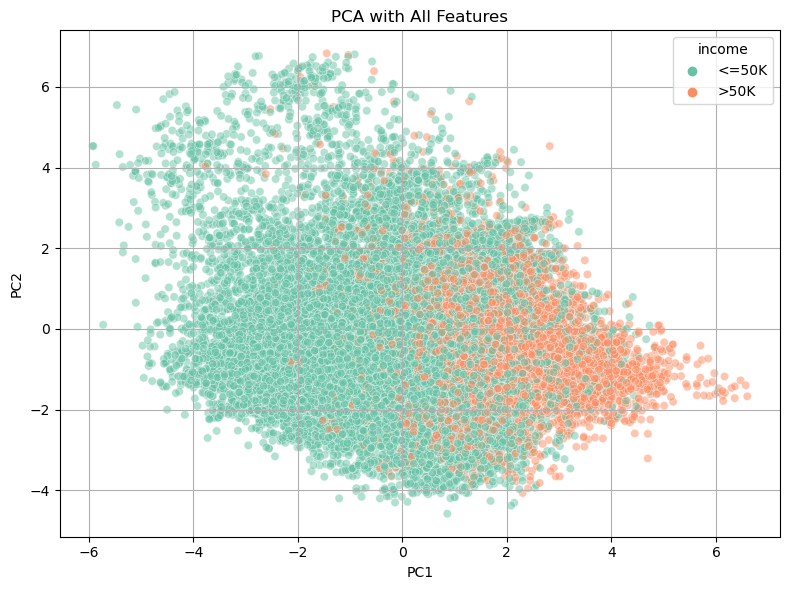

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to all features
pca_all = PCA(n_components=2)
X_pca_all = pca_all.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_all[:, 0], y=X_pca_all[:, 1], hue=y, alpha=0.5, palette='Set2')
plt.title('PCA with All Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tight_layout()
plt.show()


I created a PCA plot using all features to see how well the income groups separate along the principal components. There’s some mild separation between the <=50K and >50K groups, but the clusters still overlap quite a bit. This suggests that while a few features help distinguish income levels, a lot of the data may be redundant or not very informative. It reinforces the importance of feature selection to reduce noise and focus on the variables that actually contribute to class separation.

## Step 4: PCA with Top Features Only

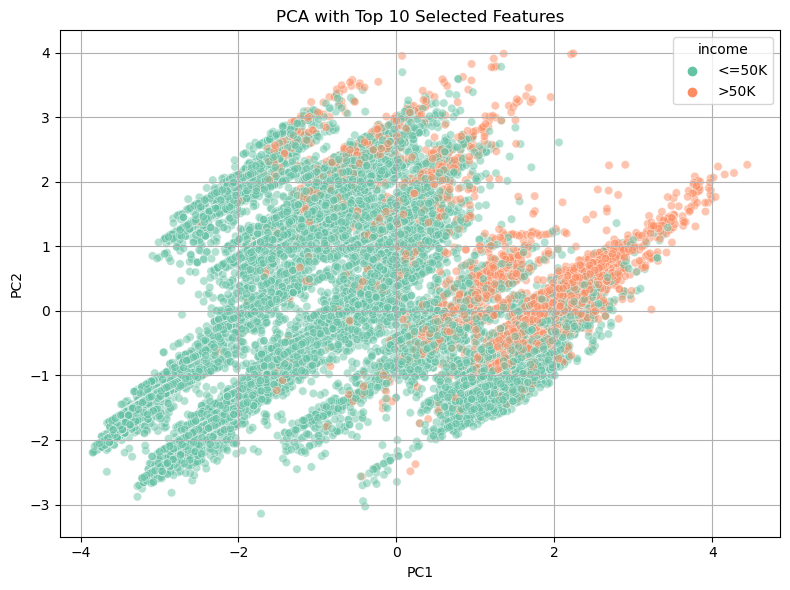

In [6]:
top_10_features = ['marital_status_Married-civ-spouse', 'education_num', 
                   'marital_status_Never-married', 'age', 'capital_gain',
                   'hours_per_week', 'relationship_Own-child', 'sex_Male',
                   'occupation_Exec-managerial', 'relationship_Not-in-family']

# Filter dataset to top 10
X_top = df_clean[top_10_features]

# Scale again
X_top_scaled = scaler.fit_transform(X_top)

# PCA
pca_top = PCA(n_components=2)
X_pca_top = pca_top.fit_transform(X_top_scaled)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_top[:, 0], y=X_pca_top[:, 1], hue=y, alpha=0.5, palette='Set2')
plt.title('PCA with Top 10 Selected Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tight_layout()
plt.show()


This PCA plot, created using the top 10 selected features, shows better class separation between the income groups compared to the full-feature version. The clusters are more distinct, especially along the first principal component (PC1), which suggests that these features do a better job of capturing the patterns that separate <=50K and >50K individuals. This supports the idea that feature selection not only helps reduce dimensionality but also keeps the most meaningful signals for classification.

## 5. PCA Comparison and Feature Selection Insights

 Comparing the PCA plots with and without feature selection gives a clearer picture of how feature relevance impacts class separation. With all features included, the points are tightly packed with a lot of overlap between income groups. There’s a slight shift for the >50K class, but it’s not well defined, suggesting that many features add noise rather than helpful signal.

 In contrast, the PCA plot using the top 10 features (selected via Mutual Information) shows a much cleaner structure. The >50K group shifts more clearly along the PC1 axis, and while some overlap remains as expected with socio economic data the separation is easier to interpret. Key features like marital status, capital gain, and education_num clearly help define the variance that matters most.

 The visible “banding” in the top-10 PCA plot comes from one-hot encoding and reflects the categorical nature of the strongest features. It also highlights patterns that would’ve been hidden if weaker features weren’t filtered out.

 Overall, this comparison shows that feature selection doesn’t just boost model performance it also helps reveal structure in the data and makes visualizations easier to interpret.